In [41]:
from ACAgraphML.Dataset import ZINC_Dataset
from ACAgraphML.Plotting import plotGraph
from torch_geometric.utils import to_dense_adj
import matplotlib.pyplot as plt
import seaborn as sns
import torch
sns.set_theme()

%load_ext autoreload
%autoreload 2

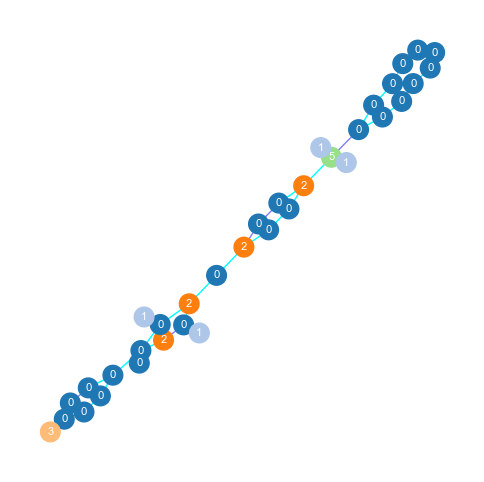

In [38]:
dataset = ZINC_Dataset.SMALL_VAL.load()
graph = dataset[0]
plotGraph(graph)

In [32]:
adjMatrix = to_dense_adj(graph.edge_index).squeeze()
adjMatrix.shape

torch.Size([23, 23])

Number of nodes: 23
Number of edges: 26.0
E - N + 1: 4.0
====== A^2 ======
Trace of A^2 = 52.0
Trace of A^2 / 2k = 13.0
====== A^3 ======
Trace of A^3 = 6.0
Trace of A^3 / 2k = 1.0
====== A^4 ======
Trace of A^4 = 216.0
Trace of A^4 / 2k = 27.0
====== A^5 ======
Trace of A^5 = 90.0
Trace of A^5 / 2k = 9.0
====== A^6 ======
Trace of A^6 = 1078.0
Trace of A^6 / 2k = 89.83333587646484
====== A^7 ======
Trace of A^7 = 812.0
Trace of A^7 / 2k = 58.0
====== A^8 ======
Trace of A^8 = 5912.0
Trace of A^8 / 2k = 369.5
====== A^9 ======
Trace of A^9 = 6324.0
Trace of A^9 / 2k = 351.3333435058594
====== A^10 ======
Trace of A^10 = 34432.0
Trace of A^10 / 2k = 1721.5999755859375


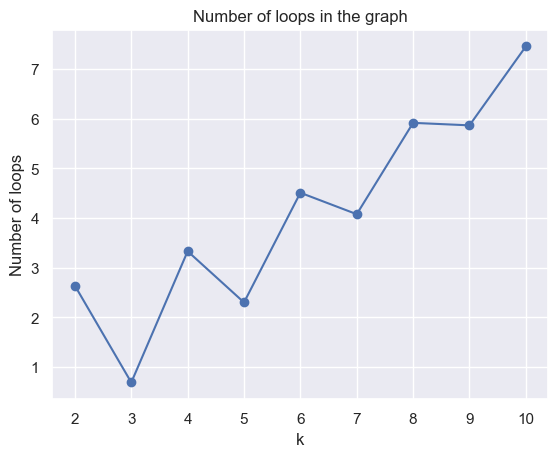

In [39]:
A = adjMatrix
maxK = 10
print(f"Number of nodes: {A.shape[0]}")
print(f"Number of edges: {A.sum().item() / 2}")
print(f"E - N + 1: {A.sum().item() / 2 - A.shape[0] + 1}")
loops = []
for k in range(2, maxK + 1):
    print(f"====== A^{k} ======")
    A @= adjMatrix
    trace = A.diagonal().sum()
    print(f"Trace of A^{k} = {trace}")
    trace /= 2*k
    print(f"Trace of A^{k} / 2k = {trace}")

    loops.append(trace)

loops = torch.tensor(loops)

plt.plot(range(2, maxK+1), torch.log(loops + 1), marker='o')
plt.xlabel("k")
plt.ylabel("Number of loops")
plt.title("Number of loops in the graph")
plt.show()

In [50]:
from ACAgraphML.Transforms import BagOfPathsTransform

bagOfPathsTransform = BagOfPathsTransform(maxPathLength=maxK)
transformedGraph = bagOfPathsTransform(graph)
transformedGraph.x.shape

torch.Size([35, 10])
torch.Size([9])


torch.Size([1, 9])